In [1]:
import os, sys
print(os.getcwd())
path = os.getcwd()+"/.."
sys.path.append(path)

#imports
import numpy as np

#from scipy import constants as const
from matplotlib import pyplot as plt

##Ensembler
from ensembler.freeEnergyCalculation import zwanzigEquation, threeStateZwanzigReweighting, bennetAcceptanceRatio

#from ensembler.potentials import OneD as pot
#from ensembler.visualisation.plotSimulations import static_sim_plots


c:\Users\benja\OneDrive - ETHZ\PhD\Code\ensembler_riniker_develop\examples
SYSTEM ASSIGNS random POSITION FOR: states: 2	nDim: 1


# Testing Zwanzig

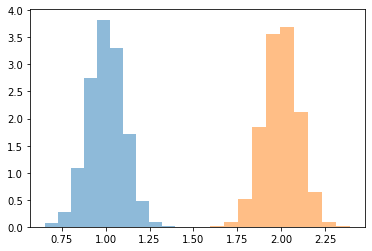

In [44]:
#Parameters

samples = 10000

#Ensemble Params
V1_min = 1
V2_min = 2

V1_noise = 0.1
V2_noise = 0.1


V1 = np.random.normal(V1_min, V1_noise, samples)
V2 = np.random.normal(V2_min, V2_noise, samples)

plt.hist(V1, alpha=0.5, density=True)
plt.hist(V2, alpha=0.5, density=True)

pass


In [45]:
zwanz = zwanzigEquation(kT=True)

dF_ana = V2_min - V1_min
dF_zwanzig = zwanz.calculate(Vi=V1, Vj=V2)

print("Expected Result: ", dF_ana)
print("Zwanzig Result: ", dF_zwanzig)
print()
print("Difference:", dF_zwanzig - dF_ana)

Expected Result:  1
Zwanzig Result:  0.9875062850478645
Difference: -0.01249371495213547


# EDS - Zwanzig Reweigting:

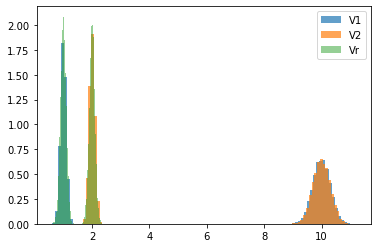

In [71]:

#Sampling:
sample_state1 = 10000
sample_state2 = 10000

# State 1 description
state_1 = 1
state_1_noise = 0.1

# State 2 description
state_2 = 2
state_2_noise = 0.1

#OffSampling
energy_off_state = 10
noise_off_state = 0.3

V1 = np.concatenate([np.random.normal(state_1, state_1_noise, sample_state1), 
                np.random.normal(energy_off_state, noise_off_state, sample_state2)])
V2 = np.concatenate([np.random.normal(energy_off_state, noise_off_state, sample_state1), 
                    np.random.normal(state_2, state_2_noise, sample_state2)])
Vr = np.concatenate([np.random.normal(state_1, state_1_noise, sample_state1),
                    np.random.normal(state_2, state_2_noise, sample_state2)])

plt.hist(V1, alpha=0.7, bins=100, density=True, label="V1")
plt.hist(V2, alpha=0.7, bins=100, density=True, label="V2")
plt.hist(Vr, alpha=0.5, bins=100, density=True, label="Vr")
plt.legend()
pass


In [72]:

rew_zwanz = threeStateZwanzigReweighting(kT=True)

dF_ana = V1_min-V2_min
dFRew_zwanz = rew_zwanz.calculate(Vi=V1, Vj=V2, Vr=Vr)

print()
print("Expected Result: ", dF_ana)
print("dF_Calc Result: ", dFRew_zwanz)
print()
print("Difference:", dFRew_zwanz - dF_ana)


Expected Result:  -1
dF_Calc Result:  -1.0039137565155318

Difference: -0.00391375651553183


## Sample Randomness for EDS

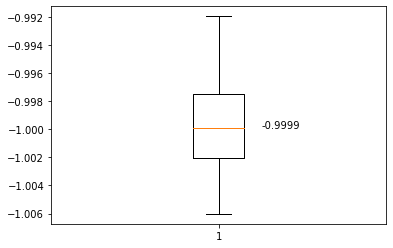

In [61]:
#Asses Randomness

dFs= []
repetitions = 25
rew_zwanz = threeStateZwanzigReweighting(kT=True)

for x in range(repetitions):
    V1 = np.concatenate([np.random.normal(state_1, state_1_noise, sample_state1), 
                    np.random.normal(energy_off_state, noise_off_state, sample_state2)])
    V2 = np.concatenate([np.random.normal(energy_off_state, noise_off_state, sample_state1), 
                        np.random.normal(state_2, state_2_noise, sample_state2)])
    Vr = np.concatenate([np.random.normal(state_1, state_1_noise, sample_state1),
                        np.random.normal(state_2, state_2_noise, sample_state2)])

    dF = rew_zwanz.calculate(V1, V2, Vr)   
    dFs.append(dF)

np.mean(dFs), np.std(dFs)
b = plt.boxplot(dFs)
plt.text(b["medians"][0]._x[1]*1.05, b["medians"][0]._y[0], np.round(b["medians"][0]._y[0],4))
pass

# Testing BAR

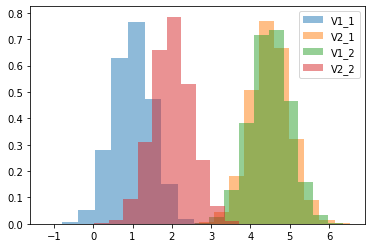

In [95]:
#simulate Bar conditions
samples = 10000

#ensemble 1
V1_min = 1
V1_noise_1 = 0.5

V2_off = 4.5
V2_noise_1 = 0.5

#ensemble 1
V1_off = 4.5
V1_noise_2 = 0.5

V2_min = 2
V2_noise_2 = 0.5

#Distributions
V1_1 = np.random.normal(V1_min, V1_noise_1, samples)
V2_1 = np.random.normal(V2_off, V2_noise_1, samples)

V1_2 = np.random.normal(V1_off, V1_noise_2, samples)
V2_2 = np.random.normal(V2_min, V2_noise_2, samples)

#PlotData
plt.hist(V1_1, alpha=0.5, density=True, label="V1_1")
plt.hist(V2_1, alpha=0.5, density=True, label="V2_1")
plt.hist(V1_2, alpha=0.5, density=True, label="V1_2")
plt.hist(V2_2, alpha=0.5, density=True, label="V2_2")
plt.legend()
pass

In [96]:
bar = bennetAcceptanceRatio(kT=True)
dF_bar = bar.calculate(Vi_i=V1_1, Vj_i=V2_1, Vi_j=V1_2, Vj_j=V2_2)

dF_ana = V2_min - V1_min

print()
print("Expected Result: ", dF_ana)
print("BAR Result: ", dF_bar)
print()
print("Difference:", dF_bar - dF_ana)

Iteration: 1	dF: -1.000227997908772783622541562		tDiff:  1.0002279979087727
Iteration: 2	dF: 1.899999999999999999999999982E-26		tDiff:  0.5001139989543864
Iteration: 3	dF: -0.5001139989543863918112707839		tDiff:  0.2500569994771932
Iteration: 4	dF: -0.2500569994771931959056353860		tDiff:  0.1250284997385966
Iteration: 5	dF: -0.3750854992157897938584530963		tDiff:  0.0625142498692983
Iteration: 6	dF: -0.3125712493464914948820442286		tDiff:  0.03125712493464915
Final Iterations:  6  Result:  -0.3125712493464914948820442286 	 0.03125712493464915

Expected Result:  1
BAR Result:  -0.3125712493464915

Difference: -1.3125712493464916


## Sample Randomness for EDS

# NB BAR